## Skin Disease Text Classification
Skin Disease Text Classification uses NLP to categorize dermatology texts for diagnosis and research. Challenges include complex terms, data scarcity, class imbalance, and privacy concerns. It aids diagnosis, clinical support, and telemedicine.

**Dataset:** [Skin Disease Text Classification](https://www.kaggle.com/datasets/rafsunahmad/skin-disease-text-classification/data)



# SetUp

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GRU, LSTM, Dropout
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

import re
import shutil
import string

from tensorflow.keras import layers
from tensorflow.keras import losses


In [2]:
print(tf.__version__)

2.18.0


In [3]:
num_words = 10000
max_review_len = 200
batch_size = 32
seed = 42

# Load Data

In [4]:
data = pd.read_csv('Skin_text_classifier.csv')

In [5]:
data.head()

,Disease name,Text
0,Vitiligo,"""I've had these light patches on my neck and f..."
1,Scabies,"""Doctor, I've noticed these small, red bumps o..."
2,Vitiligo,"""Doctor, I noticed a pale patch around my knee..."
3,Hives (Urticaria),"Hives, also known as urticaria, typically pres..."
4,Folliculitis,"""I have these small, hard bumps on my buttocks..."


# Data Split

In [6]:
train = data.sample(frac=0.8, random_state=seed)
test = data.drop(train.index)

In [7]:
problem_description = train['Text']
problem_description[:5]

,Text
117,"""Coach, I've been having this intense itching ..."
19,"""I'm usually healthy, but I've been feeling ru..."
82,"""My hands are dry and cracked, and the skin i..."
97,"""My wife has these red, crusty sores on her ha..."
56,"""My feet are killing me! They're itchy and bur..."


In [8]:
num_class = len(train['Disease name'].unique())

# Preprocessing

using tf.keras.layers.TextVectorization layer and custom functions:


## Tokenization
to splitting strings into tokens.

In [9]:
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(problem_description)
tokenizer.word_index

{'and': 1,
 'my': 2,
 'i': 3,
 'the': 4,
 'to': 5,
 'it': 6,
 'on': 7,
 'skin': 8,
 'red': 9,
 'a': 10,
 "i'm": 11,
 'be': 12,
 'these': 13,
 'or': 14,
 'have': 15,
 "it's": 16,
 'itchy': 17,
 'in': 18,
 'of': 19,
 'is': 20,
 'but': 21,
 'that': 22,
 'can': 23,
 'this': 24,
 "i've": 25,
 'been': 26,
 'like': 27,
 'patches': 28,
 'worried': 29,
 'might': 30,
 'they': 31,
 'at': 32,
 'bumps': 33,
 'now': 34,
 'with': 35,
 'lately': 36,
 'me': 37,
 "they're": 38,
 'from': 39,
 'especially': 40,
 'for': 41,
 'symptoms': 42,
 'could': 43,
 'getting': 44,
 'may': 45,
 'itching': 46,
 'are': 47,
 'painful': 48,
 'as': 49,
 'rash': 50,
 'some': 51,
 'do': 52,
 'worse': 53,
 'feel': 54,
 'something': 55,
 'often': 56,
 'has': 57,
 'really': 58,
 'about': 59,
 'around': 60,
 'noticed': 61,
 'between': 62,
 'hands': 63,
 'dry': 64,
 'look': 65,
 'when': 66,
 'arms': 67,
 'work': 68,
 'over': 69,
 'toes': 70,
 'what': 71,
 "that's": 72,
 'making': 73,
 'causing': 74,
 'face': 75,
 'get': 76,
 'aft

## Vectorization
to converting tokens into numbers.

In [10]:
# Now we can transform the reviews to it's numerical value
sequences = tokenizer.texts_to_sequences(problem_description)

In [11]:
# we should limit the sequnces length, the shorter reviews will be added by zeroes, the longer will be cut
x_train = pad_sequences(sequences, maxlen=max_review_len)
x_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0, 228,  25,  26, 470,  24, 186,  46,  62,   2, 229,   

In [12]:
y_train, y_test = train['Disease name'], test['Disease name']

# Create a mapping from disease names to numerical labels
disease_to_label = {disease: label for label, disease in enumerate(train['Disease name'].unique())}

# Convert disease names in y_train and y_test to numerical labels
y_train = train['Disease name'].map(disease_to_label)
y_test = test['Disease name'].map(disease_to_label)

# Convert labels to TensorFlow tensors
y_train = tf.convert_to_tensor(y_train, dtype=tf.int32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.int32)

In [13]:
y_train

<tf.Tensor: shape=(114,), dtype=int32, numpy=
array([ 0,  1,  2,  3,  4,  5,  6,  3,  7,  2,  4,  8,  0,  9,  5,  0,  4,
        9,  7,  2, 10,  1,  9,  7,  3,  8,  4,  6,  2,  5,  4,  1,  7, 11,
       12, 10, 10,  5,  0, 12, 12,  9, 11,  7, 12,  1,  3,  8, 10,  1,  6,
        8,  3,  3,  4,  5,  6,  4,  3,  9,  6,  2,  8,  2,  9,  5,  6,  8,
       10,  7, 11,  2,  7,  1,  9,  3,  7,  3,  6, 10, 10,  2,  1, 12,  6,
       12, 10, 12,  9, 12,  4,  7,  0, 10,  4,  2, 11,  6, 11,  0, 11,  2,
        1, 10, 12,  5,  1,  8,  5,  4,  5,  7,  0,  9], dtype=int32)>

# Create the Model

In [14]:
model = tf.keras.Sequential([
  Embedding(num_words, 64, input_length=max_review_len),
  GRU(128),
  layers.Dense(num_class, activation='sigmoid')])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

# Model Compile

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
model_save_path = './best_model.h5'
checkpoint_callback = ModelCheckpoint(model_save_path,
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

# Model Training

In [17]:
history = model.fit(x_train,
                    y_train,
                    epochs=50,
                    batch_size=128,
                    validation_split=0.1,
                    callbacks=[checkpoint_callback])

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.0490 - loss: 2.5658
Epoch 1: val_accuracy improved from -inf to 0.25000, saving model to ./best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.0490 - loss: 2.5658 - val_accuracy: 0.2500 - val_loss: 2.5610
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 766ms/step - accuracy: 0.1667 - loss: 2.5588
Epoch 2: val_accuracy did not improve from 0.25000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 884ms/step - accuracy: 0.1667 - loss: 2.5588 - val_accuracy: 0.1667 - val_loss: 2.5628
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2843 - loss: 2.5517
Epoch 3: val_accuracy did not improve from 0.25000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.2843 - loss: 2.5517 - val_accuracy: 0.1667 - val_loss: 2.5646
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3627 - loss: 2.5445
Epoch 4: val_accuracy did not improve from 0.25000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.3627 - loss: 2.5445 - val_accuracy: 0.1667 - val_loss: 2.5665
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 606ms/step - accuracy: 0.4118 - loss: 2.5371
Epoch 5: val_accuracy did not improve from 0.25000
1/1 ━━━━━━━━━━━

# Evaluate the model

In [18]:
model.load_weights(model_save_path)


In [19]:
test_sequences = tokenizer.texts_to_sequences(test['Text'])
x_test = pad_sequences(test_sequences, maxlen=max_review_len)
x_test[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,  84,  25,  61,  13, 102,   9,  33,   7,   2, 859,   

In [20]:
scores = model.evaluate(x_test, y_test, verbose=1)
print("The percent of correct answers:", round(scores[1] * 100, 4))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.1034 - loss: 2.5691
The percent of correct answers: 10.3448


# Create a plot of accuracy and loss over time

In [21]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

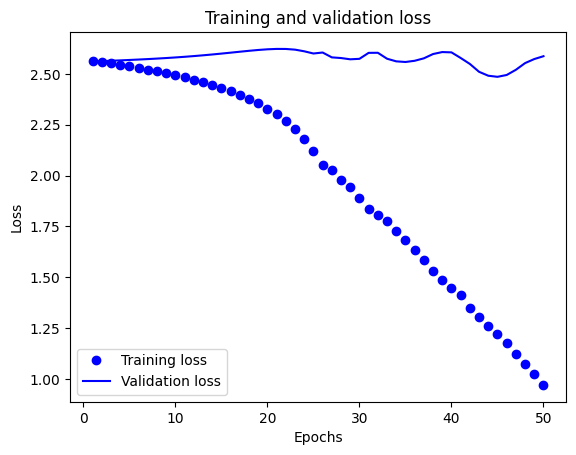

In [22]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

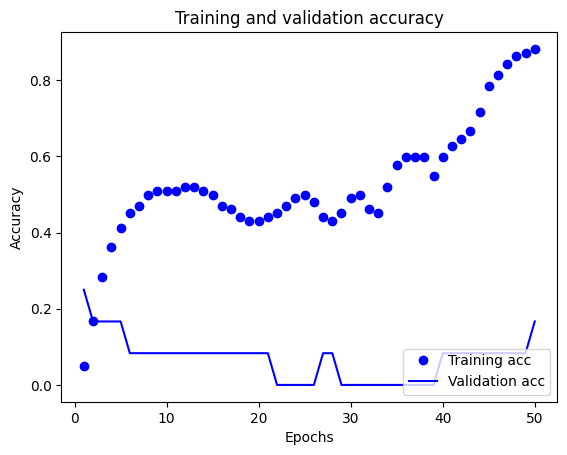

In [23]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

# Avoiding Overfitting
- Class Imbalance
- Drop-out
- Data Augmentation
- Early stopping
- L1 or L2 Regularization
- Learning Rate Reduction on Plateau
- Save the best model